In [2]:
import pandas as pd

orders = pd.read_csv("orders.csv")
print(orders.head())


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  


In [3]:
users = pd.read_json("users.json")
print(users.head())


   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold


In [4]:
import sqlite3

conn = sqlite3.connect("restaurants.db")

with open("restaurants.sql", "r") as f:
    sql_script = f.read()

cursor = conn.cursor()
cursor.executescript(sql_script)
conn.commit()


In [5]:
restaurants = pd.read_sql_query("SELECT * FROM restaurants", conn)
print(restaurants.head())


   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8


In [6]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)


In [7]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)


In [9]:
print(final_df.head())
print(final_df.shape)


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

In [10]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


## Load Final Dataset

### Subtask:
Load the `final_food_delivery_dataset.csv` into a pandas DataFrame for analysis. This DataFrame contains all the merged information.


In [12]:
final_df = pd.read_csv('final_food_delivery_dataset.csv')
print(final_df.head())

   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

## Prepare Data for Analysis

### Subtask:
Convert the 'order_date' column to datetime objects to enable time-based analysis. Extract year, month, and day information as needed for trend analysis.


In [14]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], format='%d-%m-%Y')

final_df['order_year'] = final_df['order_date'].dt.year
final_df['order_month'] = final_df['order_date'].dt.month
final_df['order_day'] = final_df['order_date'].dt.day

print(final_df.head())
print(final_df.info())

   order_id  user_id  restaurant_id order_date  total_amount  \
0         1     2508            450 2023-02-18        842.97   
1         2     2693            309 2023-01-18        546.68   
2         3     2084            107 2023-07-15        163.93   
3         4      319            224 2023-10-04       1155.97   
4         5     1064            293 2023-12-25       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  order_year  order_month  order_day  
0    Restaurant_450  Mexican     3.2        2023            2         18  
1    Restaurant_309   Indian     4.5        

## Analyze Order Trends Over Time

### Subtask:
Calculate and visualize the number of orders over time (e.g., monthly, quarterly) to identify trends and patterns. Provide appropriate labels and a legend.


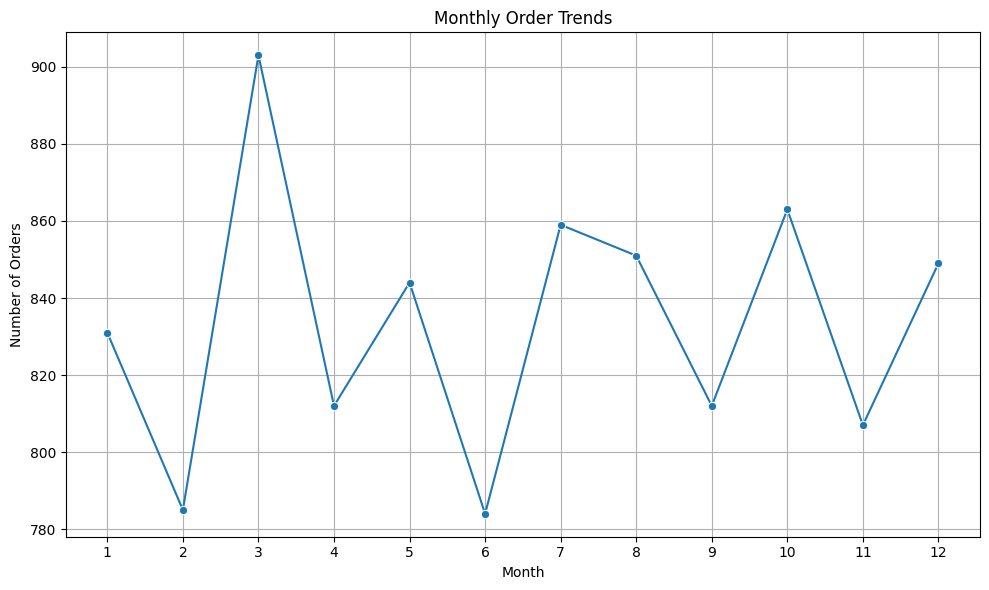

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by order_month and count unique order_ids for monthly order count
monthly_orders = final_df.groupby('order_month')['order_id'].nunique().reset_index()
monthly_orders.columns = ['order_month', 'number_of_orders']

# Visualize the monthly order count
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='number_of_orders', data=monthly_orders, marker='o')

# Add title and labels
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(monthly_orders['order_month'])
plt.grid(True)
plt.tight_layout()
plt.show()


## Analyze User Behavior Patterns

### Subtask:
Investigate user behavior by analyzing metrics such as the number of orders per user, average spend per user, and identifying top users by order count or total spend. Visualize key findings.


**Reasoning**:
The subtask requires analyzing user behavior patterns by calculating metrics like orders per user, total spend per user, and average spend per order. I will group the `final_df` by `user_id` and compute these aggregates. I will then display the head of the resulting DataFrame to show the calculated metrics.



In [16]:
user_behavior = final_df.groupby('user_id').agg(
    orders_per_user=('order_id', 'nunique'),
    total_spend_per_user=('total_amount', 'sum')
).reset_index()

user_behavior['avg_spend_per_order'] = user_behavior['total_spend_per_user'] / user_behavior['orders_per_user']

print("User behavior metrics:")
print(user_behavior.head())


User behavior metrics:
   user_id  orders_per_user  total_spend_per_user  avg_spend_per_order
0        1                1               1289.66             1289.660
1        2               10               7564.12              756.412
2        3                2               1839.51              919.755
3        4                4               3741.16              935.290
4        5                5               5742.88             1148.576


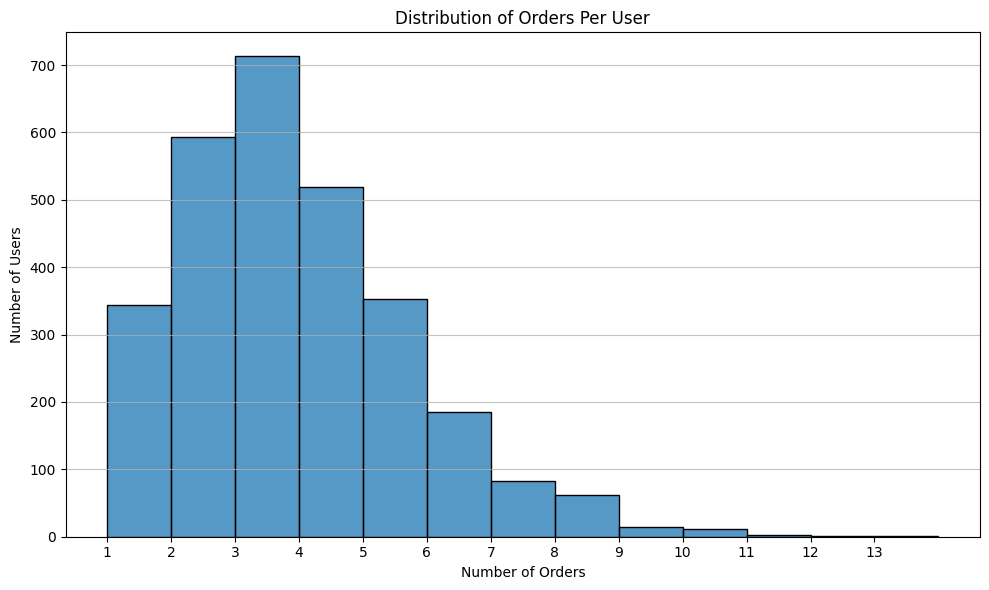

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['orders_per_user'], bins=range(1, user_behavior['orders_per_user'].max() + 2), kde=False)
plt.title('Distribution of Orders Per User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.xticks(range(1, user_behavior['orders_per_user'].max() + 1, max(1, (user_behavior['orders_per_user'].max() // 10))))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
I will now create a histogram to visualize the distribution of 'total_spend_per_user' to understand how much users typically spend. This addresses the sixth instruction of the subtask.



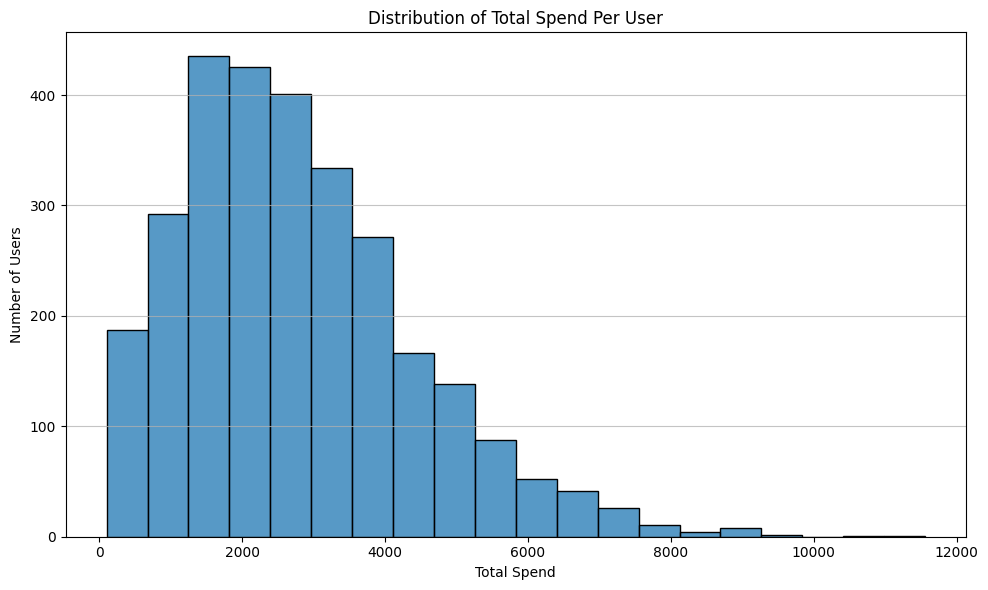

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['total_spend_per_user'], bins=20, kde=False)
plt.title('Distribution of Total Spend Per User')
plt.xlabel('Total Spend')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
To identify the top 10 users by the number of orders, I will sort the `user_behavior` DataFrame by the 'orders_per_user' column in descending order and display the top 10 rows. This addresses the seventh instruction of the subtask.



In [19]:
top_10_users_by_orders = user_behavior.sort_values(by='orders_per_user', ascending=False).head(10)
print("Top 10 users by number of orders:")
print(top_10_users_by_orders)

Top 10 users by number of orders:
      user_id  orders_per_user  total_spend_per_user  avg_spend_per_order
2856     2973               13               9063.07           697.159231
1451     1515               12              11556.49           963.040833
482       496               11               9634.30           875.845455
842       874               11               8916.55           810.595455
1278     1337               11               8907.50           809.772727
1152     1201               10               7076.86           707.686000
760       789               10               6800.90           680.090000
2540     2640               10               6527.84           652.784000
1769     1841               10               7567.36           756.736000
627       650               10              10747.44          1074.744000


In [20]:
top_10_users_by_spend = user_behavior.sort_values(by='total_spend_per_user', ascending=False).head(10)
print("Top 10 users by total spend:")
print(top_10_users_by_spend)

Top 10 users by total spend:
      user_id  orders_per_user  total_spend_per_user  avg_spend_per_order
1451     1515               12              11556.49           963.040833
627       650               10              10747.44          1074.744000
482       496               11               9634.30           875.845455
2487     2586               10               9486.61           948.661000
2516     2615                9               9237.32          1026.368889
613       636                9               9087.09          1009.676667
2856     2973               13               9063.07           697.159231
842       874               11               8916.55           810.595455
1278     1337               11               8907.50           809.772727
2591     2694                8               8875.71          1109.463750


## Analyze City-wise and Cuisine-wise Performance

### Subtask:
Group the data by 'city' and 'cuisine' to calculate total revenue and number of orders for each category. Visualize the top-performing cities and cuisines with appropriate labels and legends.


In [21]:
city_performance = final_df.groupby('city').agg(
    total_revenue=('total_amount', 'sum'),
    number_of_orders=('order_id', 'count')
).reset_index()

print("City Performance:")
print(city_performance.head())

City Performance:
        city  total_revenue  number_of_orders
0  Bangalore     2206946.58              2751
1    Chennai     1990513.03              2469
2  Hyderabad     1889366.58              2350
3       Pune     1924797.93              2430


**Reasoning**:
Now that 'city_performance' is created, I will sort it by 'total_revenue' in descending order to identify the top performing cities as per the second instruction.



In [22]:
top_5_cities_revenue = city_performance.sort_values(by='total_revenue', ascending=False).head(5)
print("Top 5 Cities by Total Revenue:")
print(top_5_cities_revenue)

Top 5 Cities by Total Revenue:
        city  total_revenue  number_of_orders
0  Bangalore     2206946.58              2751
1    Chennai     1990513.03              2469
3       Pune     1924797.93              2430
2  Hyderabad     1889366.58              2350


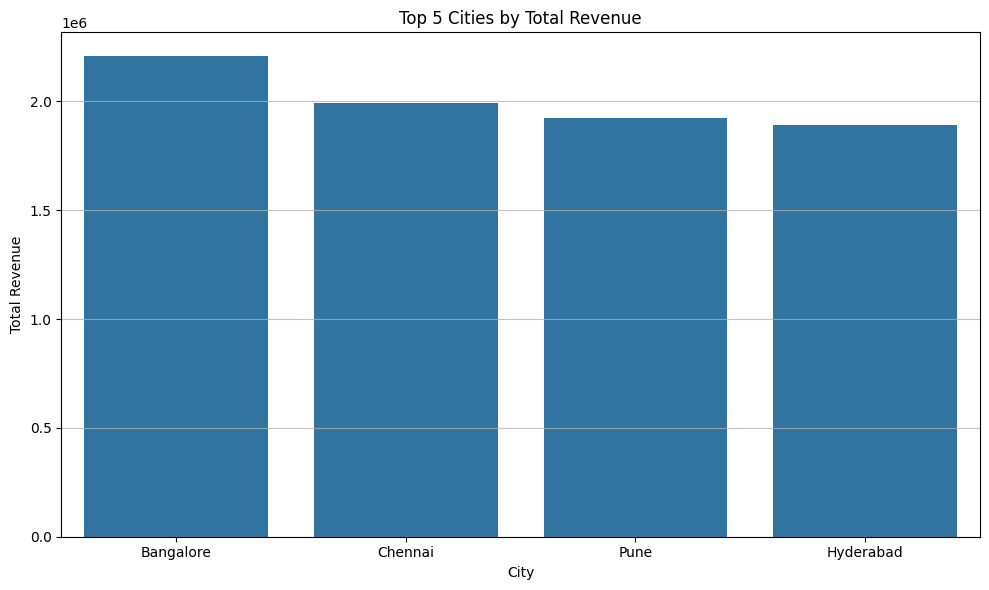

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='total_revenue', data=top_5_cities_revenue)
plt.title('Top 5 Cities by Total Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
I will now create a bar plot to visualize the number of orders by the top 5 cities, as requested by the fourth instruction. This will use the `top_5_cities_revenue` DataFrame and `seaborn`.



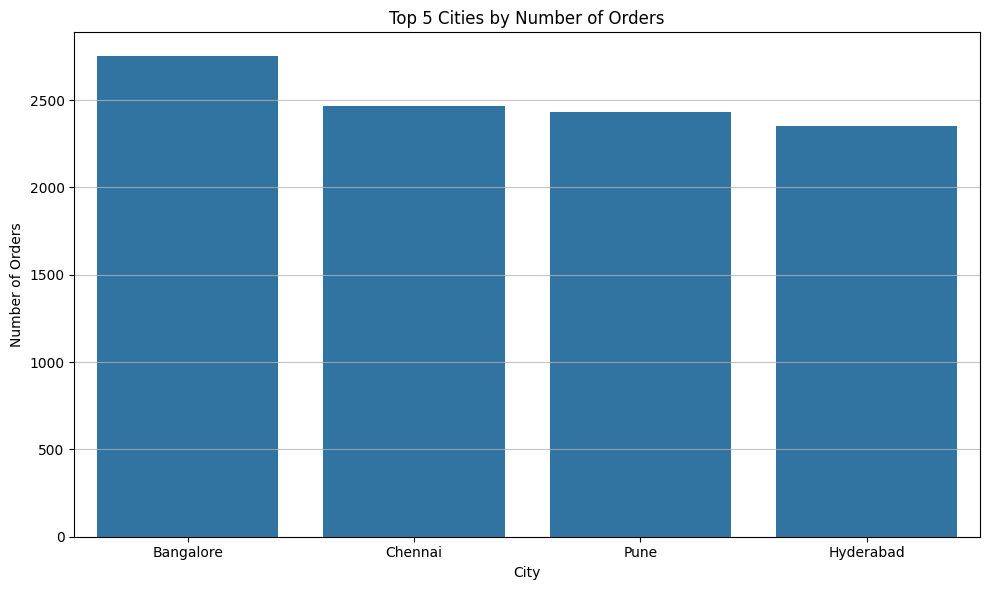

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='number_of_orders', data=top_5_cities_revenue)
plt.title('Top 5 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
The next step is to group the `final_df` by the 'cuisine' column and aggregate the 'total_amount' for total revenue and 'order_id' for the count of orders, as specified in the fifth instruction. This will create the `cuisine_performance` DataFrame.



In [25]:
cuisine_performance = final_df.groupby('cuisine').agg(
    total_revenue=('total_amount', 'sum'),
    number_of_orders=('order_id', 'count')
).reset_index()

print("Cuisine Performance:")
print(cuisine_performance.head())

Cuisine Performance:
   cuisine  total_revenue  number_of_orders
0  Chinese     1930504.65              2418
1   Indian     1971412.58              2469
2  Italian     2024203.80              2532
3  Mexican     2085503.09              2581


In [26]:
top_5_cuisines_revenue = cuisine_performance.sort_values(by='total_revenue', ascending=False).head(5)
print("Top 5 Cuisines by Total Revenue:")
print(top_5_cuisines_revenue)

Top 5 Cuisines by Total Revenue:
   cuisine  total_revenue  number_of_orders
3  Mexican     2085503.09              2581
2  Italian     2024203.80              2532
1   Indian     1971412.58              2469
0  Chinese     1930504.65              2418


**Reasoning**:
I will create a bar plot to visualize the total revenue by the top 5 cuisines, as requested by the seventh instruction. This will use the `top_5_cuisines_revenue` DataFrame and `seaborn`.



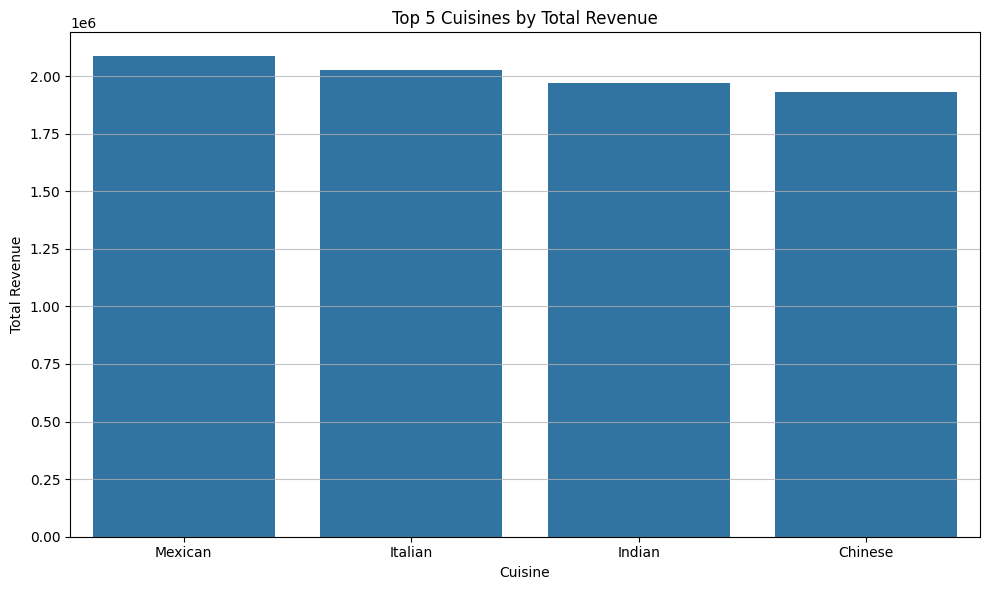

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='total_revenue', data=top_5_cuisines_revenue)
plt.title('Top 5 Cuisines by Total Revenue')
plt.xlabel('Cuisine')
plt.ylabel('Total Revenue')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
I will now create a bar plot to visualize the number of orders by the top 5 cuisines, as requested by the eighth instruction. This will use the `top_5_cuisines_revenue` DataFrame and `seaborn`.



## Analyze Membership Impact (Gold vs Regular)

### Subtask:
Compare key metrics such as total revenue, average order value, and order frequency between 'Gold' and 'Regular' membership types. Visualize the differences with clear labels and a legend.


**Reasoning**:
I will start by grouping the `final_df` DataFrame by the 'membership' column and calculating the total revenue and number of orders for each membership type, as specified in the first instruction.



In [31]:
membership_performance = final_df.groupby('membership').agg(
    total_revenue=('total_amount', 'sum'),
    number_of_orders=('order_id', 'count')
).reset_index()

print("Membership Performance:")
print(membership_performance)

Membership Performance:
  membership  total_revenue  number_of_orders
0       Gold     3975364.89              4987
1    Regular     4036259.23              5013


**Reasoning**:
I will calculate the 'average_order_value' for each membership type by dividing the 'total_revenue' by the 'number_of_orders' in the `membership_performance` DataFrame, as specified in the second instruction.



In [32]:
membership_performance['average_order_value'] = membership_performance['total_revenue'] / membership_performance['number_of_orders']

print("Membership Performance with Average Order Value:")
print(membership_performance.head())

Membership Performance with Average Order Value:
  membership  total_revenue  number_of_orders  average_order_value
0       Gold     3975364.89              4987           797.145556
1    Regular     4036259.23              5013           805.158434


**Reasoning**:
The previous output showed only the head of the `membership_performance` DataFrame. As per the third instruction, I need to print the entire `membership_performance` DataFrame to display all calculated metrics for both 'Gold' and 'Regular' memberships.



In [34]:
print("Full Membership Performance:")
print(membership_performance)

Full Membership Performance:
  membership  total_revenue  number_of_orders  average_order_value
0       Gold     3975364.89              4987           797.145556
1    Regular     4036259.23              5013           805.158434


**Reasoning**:
Now, I will create a bar plot to visualize the 'total_revenue' for 'Gold' vs. 'Regular' memberships, as specified in the fourth instruction. This will use the `membership_performance` DataFrame and `seaborn`.



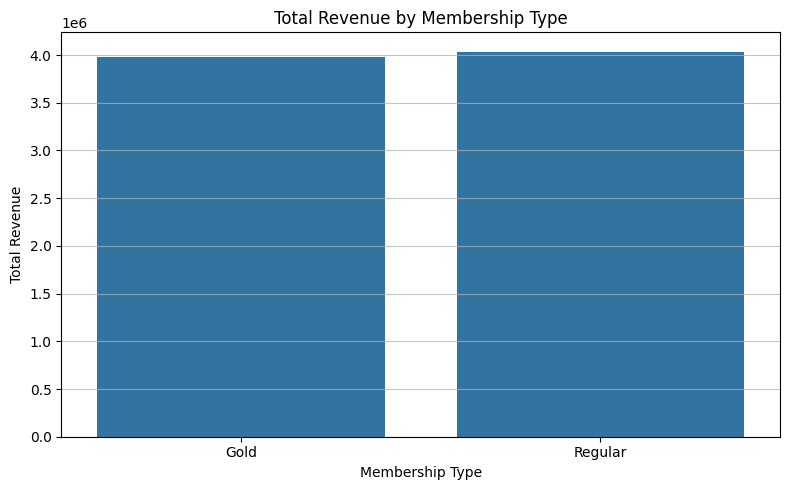

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='membership', y='total_revenue', data=membership_performance)
plt.title('Total Revenue by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Revenue')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
I will now create a bar plot to visualize the 'number_of_orders' for 'Gold' vs. 'Regular' memberships, as specified in the fifth instruction. This will use the `membership_performance` DataFrame and `seaborn`.



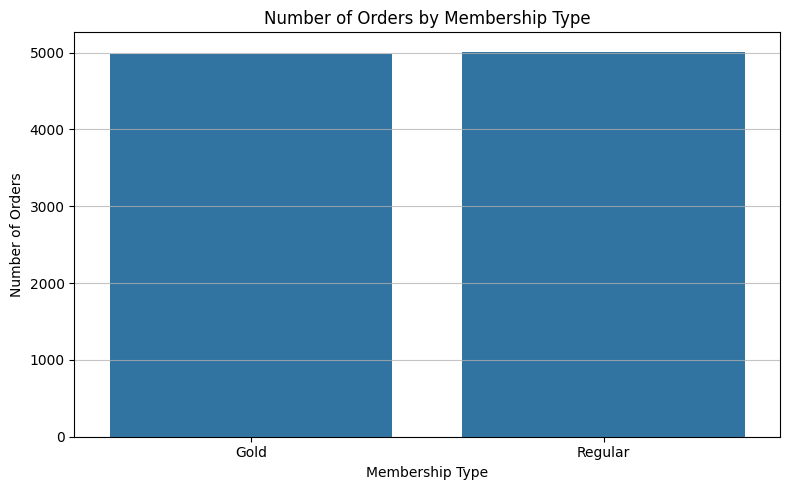

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='membership', y='number_of_orders', data=membership_performance)
plt.title('Number of Orders by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Number of Orders')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

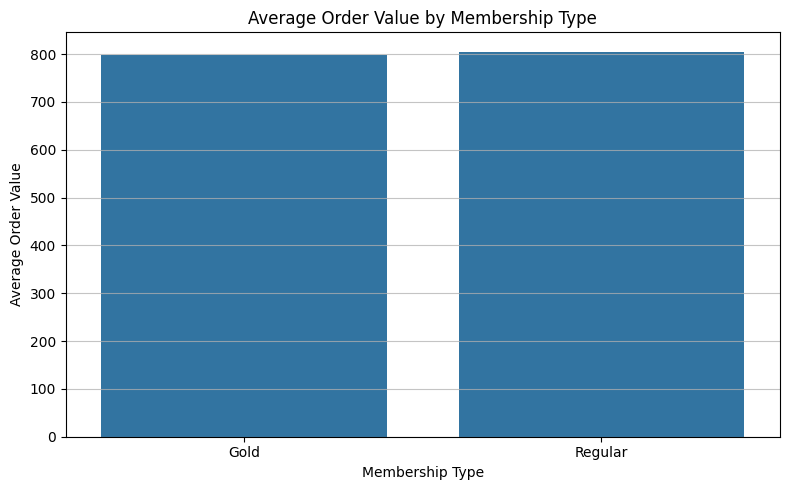

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x='membership', y='average_order_value', data=membership_performance)
plt.title('Average Order Value by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Order Value')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

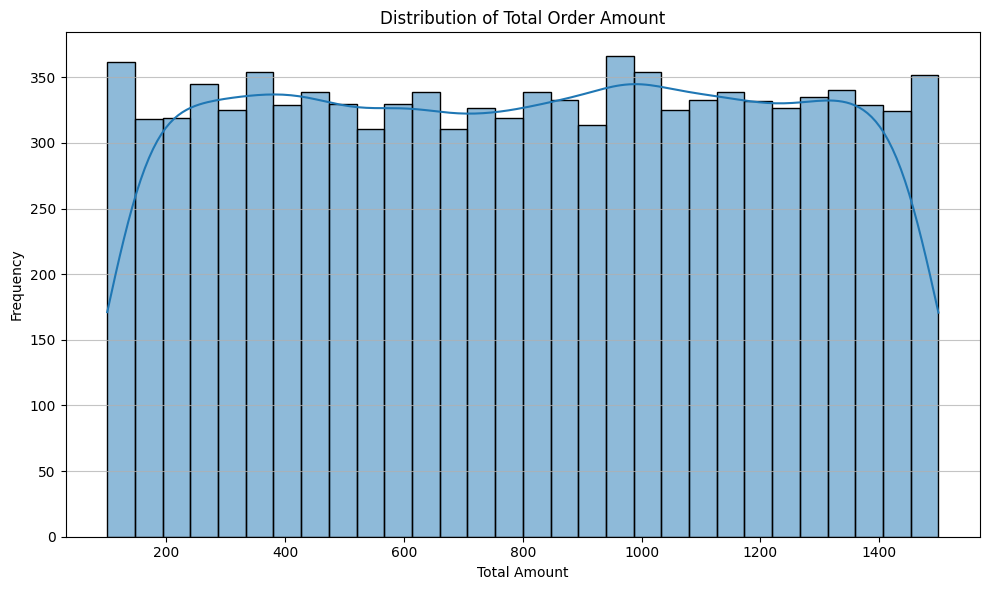

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['total_amount'], bins=30, kde=True)
plt.title('Distribution of Total Order Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
Now, I will calculate the total revenue per month by grouping the `final_df` by 'order_month' and summing the 'total_amount', as specified in the second instruction. This will create the `monthly_revenue` DataFrame.



In [40]:
monthly_revenue = final_df.groupby('order_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['order_month', 'total_revenue']

print("Monthly Revenue:")
print(monthly_revenue.head())

Monthly Revenue:
   order_month  total_revenue
0            1      663020.26
1            2      630867.40
2            3      716738.98
3            4      666097.18
4            5      668428.61


**Reasoning**:
I will create a line plot to visualize the `monthly_revenue`, as requested by the third instruction, with appropriate title and labels, and add markers and a grid for readability.



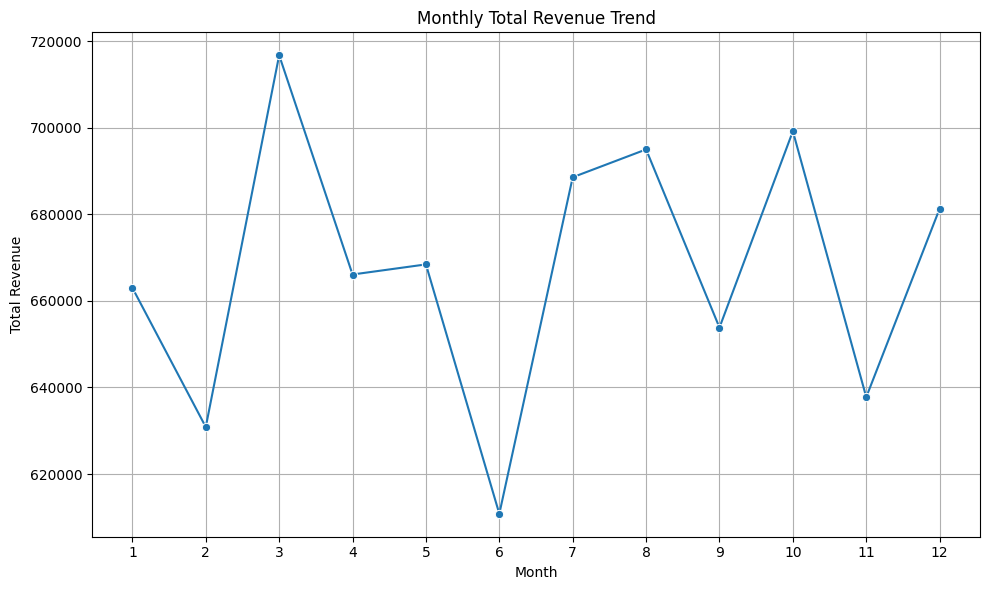

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='total_revenue', data=monthly_revenue, marker='o')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_revenue['order_month'])
plt.grid(True)
plt.tight_layout()
plt.show()